### Load dataset

In [1]:
#read csv for initial exploration
import pandas
import numpy as np
dataset = pandas.read_csv("/Users/ipsit/Downloads/Weather_data.csv")

In [2]:
dataset.sample(10)

,Unnamed: 0,wsid,wsnm,elvt,lat,lon,inme,city,prov,mdct,...,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
88863,88863,303,VITÓRIA,9,-20.271094,-40.306069,A612,Vitória,ES,2008-01-24 15:00:00,...,29.4,20.8,27.5,19.3,58,63,58,3.2,177,8.9
109478,109478,303,VITÓRIA,9,-20.271094,-40.306069,A612,Vitória,ES,2010-06-01 14:00:00,...,25.5,16.0,24.2,15.0,57,59,54,4.1,180,10.6
65677,65677,178,SÃO GONÇALO,237,-6.835777,-38.311583,A333,São Gonçalo,RJ,2015-05-04 13:00:00,...,30.5,19.7,28.4,18.5,51,59,50,1.7,108,5.9
84530,84530,303,VITÓRIA,9,-20.271094,-40.306069,A612,Vitória,ES,2007-07-28 02:00:00,...,21.0,17.9,20.8,17.7,83,83,82,0.5,254,2.9
94089,94089,303,VITÓRIA,9,-20.271094,-40.306069,A612,Vitória,ES,2008-08-29 09:00:00,...,21.3,18.2,20.3,17.7,81,85,81,1.2,321,2.8
39358,39358,178,SÃO GONÇALO,237,-6.835777,-38.311583,A333,São Gonçalo,RJ,2012-05-02 22:00:00,...,27.4,23.1,26.2,21.3,75,81,70,NaN,150,2.6
15507,15507,178,SÃO GONÇALO,237,-6.835777,-38.311583,A333,São Gonçalo,RJ,2009-08-13 03:00:00,...,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0.0
74104,74104,178,SÃO GONÇALO,237,-6.835777,-38.311583,A333,São Gonçalo,RJ,2016-04-19 16:00:00,...,30.5,19.6,29.5,17.6,49,54,47,2.7,107,6.1
89245,89245,303,VITÓRIA,9,-20.271094,-40.306069,A612,Vitória,ES,2008-02-09 13:00:00,...,29.9,20.7,28.6,19.0,57,60,55,3.0,3,6.8
134105,134105,303,VITÓRIA,9,-20.271094,-40.306069,A612,Vitória,ES,2013-03-23 17:00:00,...,29.7,23.3,27.9,21.9,71,72,65,2.5,120,5.9


In [3]:
dataset.info()
#lots of missing data in prcp and gbrd

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165000 entries, 0 to 164999
Data columns (total 32 columns):
Unnamed: 0    165000 non-null int64
wsid          165000 non-null int64
wsnm          165000 non-null object
elvt          165000 non-null int64
lat           165000 non-null float64
lon           165000 non-null float64
inme          165000 non-null object
city          165000 non-null object
prov          165000 non-null object
mdct          165000 non-null object
date          165000 non-null object
yr            165000 non-null int64
mo            165000 non-null int64
da            165000 non-null int64
hr            165000 non-null int64
prcp          20932 non-null float64
stp           165000 non-null float64
smax          165000 non-null float64
smin          165000 non-null float64
gbrd          95944 non-null float64
temp          165000 non-null float64
dewp          165000 non-null float64
tmax          165000 non-null float64
dmax          165000 non-null float64

### Narrow down to one city

In [4]:
dataset.groupby('city').count()
#Choose Sao Goncalo since it has a lesser proportion of data with missing prcp values

,Unnamed: 0,wsid,wsnm,elvt,lat,lon,inme,prov,mdct,date,...,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
city,,,,,,,,,,,,,,,,,,,,,
São Gonçalo,78048,78048,78048,78048,78048,78048,78048,78048,78048,78048,...,78048,78048,78048,78048,78048,78048,78048,67915,78048,75542
Vitória,86952,86952,86952,86952,86952,86952,86952,86952,86952,86952,...,86952,86952,86952,86952,86952,86952,86952,86952,86952,86952


In [5]:
city_df = dataset[dataset.prov != 'ES']
city_df.groupby('city').count()
#Now we only have São Gonçalo data

,Unnamed: 0,wsid,wsnm,elvt,lat,lon,inme,prov,mdct,date,...,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
city,,,,,,,,,,,,,,,,,,,,,
São Gonçalo,78048,78048,78048,78048,78048,78048,78048,78048,78048,78048,...,78048,78048,78048,78048,78048,78048,78048,67915,78048,75542


### Clean gbrd, stp, smax and smin in clean dataframe

In [6]:
city_df['gbrd'].count()
#Missing gbrd values are not counted. Hence, count is below 78048

45528

In [7]:
city_df['gbrd'].replace(to_replace=[None], value=0, inplace=True)
city_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78048 entries, 0 to 78047
Data columns (total 32 columns):
Unnamed: 0    78048 non-null int64
wsid          78048 non-null int64
wsnm          78048 non-null object
elvt          78048 non-null int64
lat           78048 non-null float64
lon           78048 non-null float64
inme          78048 non-null object
city          78048 non-null object
prov          78048 non-null object
mdct          78048 non-null object
date          78048 non-null object
yr            78048 non-null int64
mo            78048 non-null int64
da            78048 non-null int64
hr            78048 non-null int64
prcp          12829 non-null float64
stp           78048 non-null float64
smax          78048 non-null float64
smin          78048 non-null float64
gbrd          78048 non-null float64
temp          78048 non-null float64
dewp          78048 non-null float64
tmax          78048 non-null float64
dmax          78048 non-null float64
tmin          78048 non

C:\Users\ipsit\Anaconda3\lib\site-packages\pandas\core\generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [8]:
city_df['stp'].describe()

count    78048.000000
mean       866.391924
std        393.039020
min          0.000000
25%        982.600000
50%        985.000000
75%        987.000000
max       7818.700000
Name: stp, dtype: float64

In [9]:
city_df.hist(column='stp')
#There are clearly outliers in stp based on max value and histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021990E41710>]],
      dtype=object)

In [10]:
city_df['smax'].describe()

count    78048.000000
mean       935.884051
std       1016.678426
min          0.000000
25%        982.900000
50%        985.300000
75%        987.200000
max      45761.900000
Name: smax, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021990E58390>]],
      dtype=object)

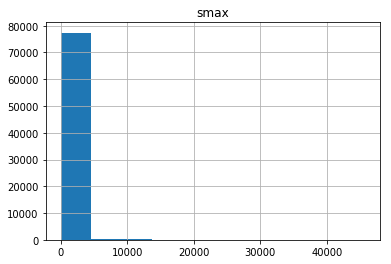

In [11]:
city_df.hist(column='smax')
#There are clearly outliers in smax based on max value and histogram

In [12]:
city_df['smin'].describe()

count    78048.000000
mean       916.702573
std        918.893261
min          0.000000
25%        982.300000
50%        984.700000
75%        986.600000
max      38556.100000
Name: smin, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002199594AF60>]],
      dtype=object)

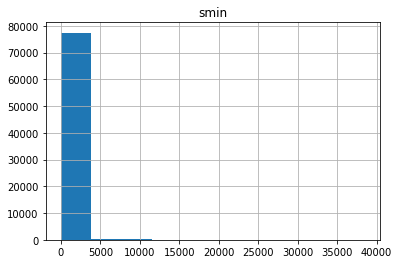

In [13]:
city_df.hist(column='smin')
#There are clearly outliers in smin based on max value and histogram

In [14]:
stp_mean = city_df['stp'].mean()
stp_mean

866.3919242004825

In [15]:
stp_std = city_df['stp'].std()
stp_std

393.0390197704358

In [16]:
smin_mean = city_df['smin'].mean()
smin_mean

916.7025727757215

In [17]:
smin_std = city_df['smin'].std()
smin_std

918.893261467472

In [18]:
smax_mean = city_df['smax'].mean()
smax_mean

935.8840508405088

In [19]:
smax_std = city_df['smax'].std()
smax_std

1016.6784257637203

In [20]:
city_df['stp_z'] = (city_df['stp']-stp_mean)/stp_std
city_df.info()
#A column stp_z has been added

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78048 entries, 0 to 78047
Data columns (total 33 columns):
Unnamed: 0    78048 non-null int64
wsid          78048 non-null int64
wsnm          78048 non-null object
elvt          78048 non-null int64
lat           78048 non-null float64
lon           78048 non-null float64
inme          78048 non-null object
city          78048 non-null object
prov          78048 non-null object
mdct          78048 non-null object
date          78048 non-null object
yr            78048 non-null int64
mo            78048 non-null int64
da            78048 non-null int64
hr            78048 non-null int64
prcp          12829 non-null float64
stp           78048 non-null float64
smax          78048 non-null float64
smin          78048 non-null float64
gbrd          78048 non-null float64
temp          78048 non-null float64
dewp          78048 non-null float64
tmax          78048 non-null float64
dmax          78048 non-null float64
tmin          78048 non

C:\Users\ipsit\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [21]:
#Calculate z-values for smax and smin
city_df['smax_z'] = (city_df['smax']-smax_mean)/smax_std
city_df['smin_z'] = (city_df['smin']-smin_mean)/smin_std
city_df.info()

C:\Users\ipsit\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ipsit\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<class 'pandas.core.frame.DataFrame'>
Int64Index: 78048 entries, 0 to 78047
Data columns (total 35 columns):
Unnamed: 0    78048 non-null int64
wsid          78048 non-null int64
wsnm          78048 non-null object
elvt          78048 non-null int64
lat           78048 non-null float64
lon           78048 non-null float64
inme          78048 non-null object
city          78048 non-null object
prov          78048 non-null object
mdct          78048 non-null object
date          78048 non-null object
yr            78048 non-null int64
mo            78048 non-null int64
da            78048 non-null int64
hr            78048 non-null int64
prcp          12829 non-null float64
stp           78048 non-null float64
smax          78048 non-null float64
smin          78048 non-null float64
gbrd          78048 non-null float64
temp          78048 non-null float64
dewp          78048 non-null float64
tmax          78048 non-null float64
dmax          78048 non-null float64
tmin          78048 non

In [22]:
#Remove outliers in stp, smax, smin. Outliers are only in the upper values, so remove any records with z-score greater than 3
new_df = city_df[city_df.smax_z < 3]
new_df[new_df.smin_z < 3]
new_df[new_df.stp_z < 3]
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77314 entries, 0 to 78047
Data columns (total 35 columns):
Unnamed: 0    77314 non-null int64
wsid          77314 non-null int64
wsnm          77314 non-null object
elvt          77314 non-null int64
lat           77314 non-null float64
lon           77314 non-null float64
inme          77314 non-null object
city          77314 non-null object
prov          77314 non-null object
mdct          77314 non-null object
date          77314 non-null object
yr            77314 non-null int64
mo            77314 non-null int64
da            77314 non-null int64
hr            77314 non-null int64
prcp          12829 non-null float64
stp           77314 non-null float64
smax          77314 non-null float64
smin          77314 non-null float64
gbrd          77314 non-null float64
temp          77314 non-null float64
dewp          77314 non-null float64
tmax          77314 non-null float64
dmax          77314 non-null float64
tmin          77314 non

### Create binary precipitation variable and evaluate

In [23]:
#Create binary precipitation variable
new_df.loc[new_df['prcp'] > 0, 'prcp_yes'] = 1
new_df.loc[new_df['prcp'] == 0, 'prcp_yes'] = 0
new_df['prcp_yes'].count()
#Total count of prcp_yes is 12829, i.e. missing values of prcp remain missing in prcp_yes

C:\Users\ipsit\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\ipsit\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


12829

In [24]:
new_df.groupby('prcp_yes').count()/12829
#Data is imbalanced between prcp_yes=0 and prcp_yes=1. 

,Unnamed: 0,wsid,wsnm,elvt,lat,lon,inme,city,prov,mdct,...,dmin,hmdy,hmax,hmin,wdsp,wdct,gust,stp_z,smax_z,smin_z
prcp_yes,,,,,,,,,,,,,,,,,,,,,
0.0,0.842466,0.842466,0.842466,0.842466,0.842466,0.842466,0.842466,0.842466,0.842466,0.842466,...,0.842466,0.842466,0.842466,0.842466,0.842466,0.842466,0.842466,0.842466,0.842466,0.842466
1.0,0.157534,0.157534,0.157534,0.157534,0.157534,0.157534,0.157534,0.157534,0.157534,0.157534,...,0.157534,0.157534,0.157534,0.157534,0.126121,0.157534,0.153636,0.157534,0.157534,0.157534


### Look into other potential features and see if they need to be cleaned

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021995CD1B70>]],
      dtype=object)

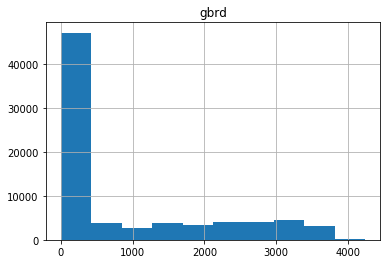

In [25]:
#Missing values detected in prcp, gust and wdsp
#Clean any outliers or missing values in potential features
new_df.hist(column='gbrd')
#No outliers detected in gbrd. Missing values have been imputed to 0.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021995BFB978>]],
      dtype=object)

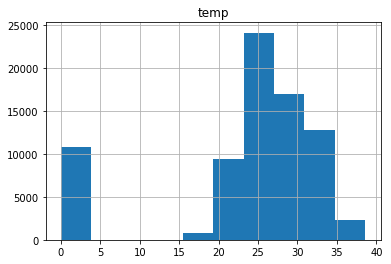

In [26]:
new_df.hist(column='temp')
#No outliers or missing values detected in temp.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021995CD1320>]],
      dtype=object)

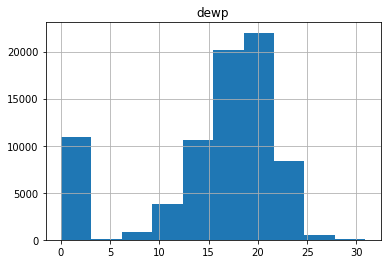

In [27]:
new_df.hist(column='dewp')
#No outliers or missing values detected in dewp.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021995CD1C18>]],
      dtype=object)

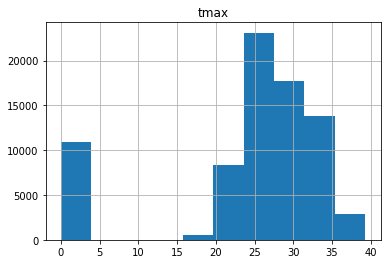

In [28]:
new_df.hist(column='tmax')
#No outliers or missing values detected in tmax.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021992580898>]],
      dtype=object)

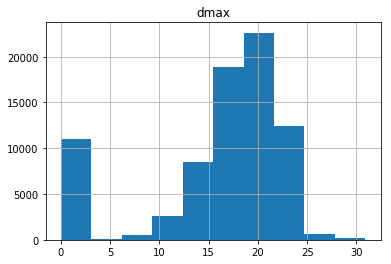

In [29]:
new_df.hist(column='dmax')

In [30]:
new_df.dmax.describe()
##No outliers or missing values detected in dmax.

count    77314.000000
mean        15.954010
std          7.230465
min          0.000000
25%         14.600000
50%         18.200000
75%         20.900000
max         30.900000
Name: dmax, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021995CF1518>]],
      dtype=object)

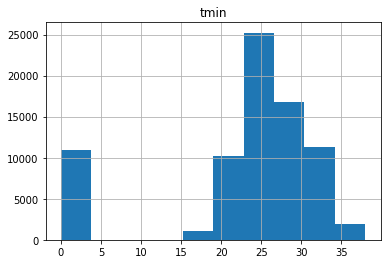

In [31]:
new_df.hist(column='tmin')
##No outliers or missing values detected in tmin.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021995DA16D8>]],
      dtype=object)

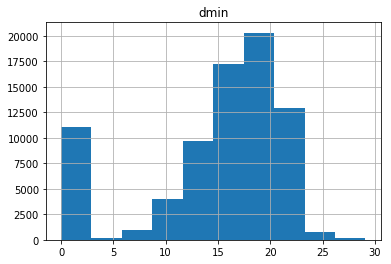

In [32]:
new_df.hist(column='dmin')

In [33]:
new_df.dmin.describe()
#No outliers or missing values detected in dmin.

count    77314.000000
mean        14.757396
std          6.881244
min          0.000000
25%         12.800000
50%         16.800000
75%         19.500000
max         29.100000
Name: dmin, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021995E6C208>]],
      dtype=object)

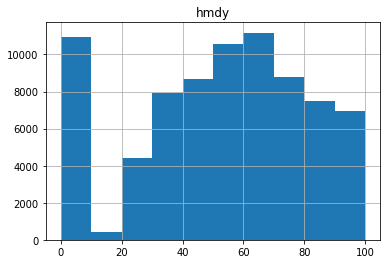

In [34]:
new_df.hist(column='hmdy')
#No outliers or missing values detected in hmdy.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021995EDD080>]],
      dtype=object)

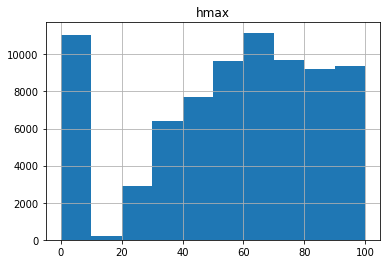

In [35]:
new_df.hist(column='hmax')
#No outliers or missing values detected in hmax.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021995F5BDD8>]],
      dtype=object)

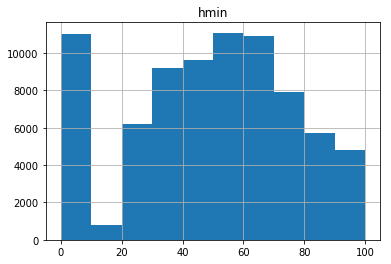

In [36]:
new_df.hist(column='hmin')
#No outliers or missing values detected in hmin.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021995F16E80>]],
      dtype=object)

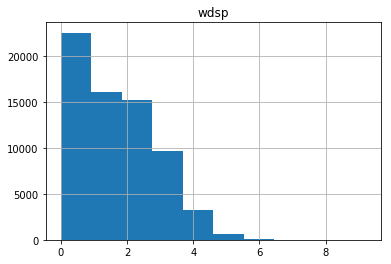

In [37]:
new_df.hist(column='wdsp')

In [38]:
new_df.wdsp.describe()
#looks like there are outliers (more than z-value of 3) and missing values. The definition of wdsp seems to similar to gust.

count    67292.000000
mean         1.630527
std          1.237265
min          0.000000
25%          0.500000
50%          1.600000
75%          2.500000
max          9.200000
Name: wdsp, dtype: float64

In [39]:
new_df['gust'].corr(new_df['wdsp'])
#There is a high correlation between gust and wdsp. Since wdsp has more missing values, drop it as a potential feature

0.8639388428906457

In [40]:
df = new_df.drop(['wdsp'], axis=1)
df.info()
#wdsp is dropped

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77314 entries, 0 to 78047
Data columns (total 35 columns):
Unnamed: 0    77314 non-null int64
wsid          77314 non-null int64
wsnm          77314 non-null object
elvt          77314 non-null int64
lat           77314 non-null float64
lon           77314 non-null float64
inme          77314 non-null object
city          77314 non-null object
prov          77314 non-null object
mdct          77314 non-null object
date          77314 non-null object
yr            77314 non-null int64
mo            77314 non-null int64
da            77314 non-null int64
hr            77314 non-null int64
prcp          12829 non-null float64
stp           77314 non-null float64
smax          77314 non-null float64
smin          77314 non-null float64
gbrd          77314 non-null float64
temp          77314 non-null float64
dewp          77314 non-null float64
tmax          77314 non-null float64
dmax          77314 non-null float64
tmin          77314 non

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021995FCCE10>]],
      dtype=object)

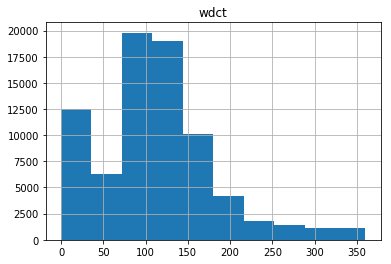

In [41]:
df.hist(column='wdct')

In [42]:
df.wdct.describe()
#Even though values make it look like there are outliers, the min/max is within the permissible 0-360 degrees.
#Therefore, do not remove or add any values for wdct

count    77314.000000
mean       110.060028
std         71.890389
min          0.000000
25%         73.000000
50%        108.000000
75%        144.000000
max        360.000000
Name: wdct, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002199603DE48>]],
      dtype=object)

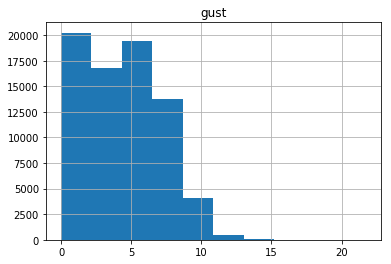

In [43]:
df.hist(column='gust')

In [44]:
df.gust.describe()
#Based on the max value and histogram, there seems to be outliers. There are also missing values.

count    74832.000000
mean         4.315638
std          2.889443
min          0.000000
25%          2.000000
50%          4.400000
75%          6.500000
max         21.700000
Name: gust, dtype: float64

In [45]:
gust_mean = df['gust'].mean()
gust_mean

4.315637695103611

In [46]:
gust_std = df['gust'].std()
gust_std

2.889443272556152

In [47]:
df['gust_z'] = (df['gust']-gust_mean)/gust_std
df.info()
#Added a column named gust_z

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77314 entries, 0 to 78047
Data columns (total 36 columns):
Unnamed: 0    77314 non-null int64
wsid          77314 non-null int64
wsnm          77314 non-null object
elvt          77314 non-null int64
lat           77314 non-null float64
lon           77314 non-null float64
inme          77314 non-null object
city          77314 non-null object
prov          77314 non-null object
mdct          77314 non-null object
date          77314 non-null object
yr            77314 non-null int64
mo            77314 non-null int64
da            77314 non-null int64
hr            77314 non-null int64
prcp          12829 non-null float64
stp           77314 non-null float64
smax          77314 non-null float64
smin          77314 non-null float64
gbrd          77314 non-null float64
temp          77314 non-null float64
dewp          77314 non-null float64
tmax          77314 non-null float64
dmax          77314 non-null float64
tmin          77314 non

In [48]:
#This will drop all rows with missing gust values and outlier gust values.
clean_df = df[df.gust_z < 3]

In [49]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74706 entries, 0 to 78047
Data columns (total 36 columns):
Unnamed: 0    74706 non-null int64
wsid          74706 non-null int64
wsnm          74706 non-null object
elvt          74706 non-null int64
lat           74706 non-null float64
lon           74706 non-null float64
inme          74706 non-null object
city          74706 non-null object
prov          74706 non-null object
mdct          74706 non-null object
date          74706 non-null object
yr            74706 non-null int64
mo            74706 non-null int64
da            74706 non-null int64
hr            74706 non-null int64
prcp          12729 non-null float64
stp           74706 non-null float64
smax          74706 non-null float64
smin          74706 non-null float64
gbrd          74706 non-null float64
temp          74706 non-null float64
dewp          74706 non-null float64
tmax          74706 non-null float64
dmax          74706 non-null float64
tmin          74706 non

In [50]:
#Drop any variables that are not the target, features or the index
clean_df = clean_df.drop(['Unnamed: 0','date','wsid','wsnm','elvt','lat','lon','inme','city','prov','yr','mo','da','hr','stp_z','smax_z','smin_z','gust_z'], axis=1)

In [51]:
clean_df.info()
#all irrelevant columns have been removed

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74706 entries, 0 to 78047
Data columns (total 18 columns):
mdct        74706 non-null object
prcp        12729 non-null float64
stp         74706 non-null float64
smax        74706 non-null float64
smin        74706 non-null float64
gbrd        74706 non-null float64
temp        74706 non-null float64
dewp        74706 non-null float64
tmax        74706 non-null float64
dmax        74706 non-null float64
tmin        74706 non-null float64
dmin        74706 non-null float64
hmdy        74706 non-null int64
hmax        74706 non-null int64
hmin        74706 non-null int64
wdct        74706 non-null int64
gust        74706 non-null float64
prcp_yes    12729 non-null float64
dtypes: float64(13), int64(4), object(1)
memory usage: 10.8+ MB


### Make DateTime index and sort by datetime

In [52]:
pandas.to_datetime(clean_df['mdct'])

0       2007-11-06 00:00:00
1       2007-11-06 01:00:00
2       2007-11-06 02:00:00
3       2007-11-06 03:00:00
4       2007-11-06 04:00:00
5       2007-11-06 05:00:00
6       2007-11-06 06:00:00
7       2007-11-06 07:00:00
8       2007-11-06 08:00:00
10      2007-11-06 10:00:00
11      2007-11-06 11:00:00
12      2007-11-06 12:00:00
13      2007-11-06 13:00:00
14      2007-11-06 14:00:00
15      2007-11-06 15:00:00
16      2007-11-06 16:00:00
17      2007-11-06 17:00:00
18      2007-11-06 18:00:00
19      2007-11-06 19:00:00
20      2007-11-06 20:00:00
21      2007-11-06 21:00:00
22      2007-11-06 22:00:00
23      2007-11-06 23:00:00
24      2007-11-07 00:00:00
25      2007-11-07 01:00:00
26      2007-11-07 02:00:00
27      2007-11-07 03:00:00
28      2007-11-07 04:00:00
29      2007-11-07 05:00:00
30      2007-11-07 06:00:00
                ...        
78018   2016-09-29 18:00:00
78019   2016-09-29 19:00:00
78020   2016-09-29 20:00:00
78021   2016-09-29 21:00:00
78022   2016-09-29 2

In [53]:
clean_df.set_index(['mdct'])

,prcp,stp,smax,smin,gbrd,temp,dewp,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdct,gust,prcp_yes
mdct,,,,,,,,,,,,,,,,,
2007-11-06 00:00:00,NaN,982.5,982.5,981.3,0.000,29.3,12.1,29.7,16.8,25.5,10.8,35,58,32,101,6.5,NaN
2007-11-06 01:00:00,NaN,983.2,983.2,982.5,0.000,29.0,13.5,29.9,13.6,29.0,12.2,39,39,35,94,6.4,NaN
2007-11-06 02:00:00,NaN,983.5,983.5,983.2,0.000,27.4,14.0,29.0,14.0,27.4,13.6,44,44,39,93,6.9,NaN
2007-11-06 03:00:00,NaN,983.7,983.7,983.4,0.000,25.8,16.9,27.4,16.9,25.8,14.1,58,58,44,96,5.8,NaN
2007-11-06 04:00:00,NaN,983.7,983.8,983.6,0.000,25.4,16.4,26.3,17.0,25.3,16.4,57,58,56,110,7.5,NaN
2007-11-06 05:00:00,NaN,983.7,983.8,983.6,0.000,23.8,16.2,25.4,16.4,23.8,16.0,62,62,57,99,6.8,NaN
2007-11-06 06:00:00,NaN,983.7,983.7,983.6,0.000,22.0,16.7,23.8,16.7,22.0,16.2,72,72,62,93,4.9,NaN
2007-11-06 07:00:00,NaN,984.6,984.6,983.7,0.000,19.7,17.4,22.0,17.8,19.5,16.6,86,89,72,157,2.8,NaN
2007-11-06 08:00:00,NaN,985.7,985.7,984.6,0.000,18.3,17.3,19.7,17.3,18.3,16.9,93,94,85,141,1.5,NaN


In [54]:
clean_df = clean_df.sort_index()
clean_df.head()
#looks like data is sorted by DateTime

,mdct,prcp,stp,smax,smin,gbrd,temp,dewp,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdct,gust,prcp_yes
0,2007-11-06 00:00:00,NaN,982.5,982.5,981.3,0.0,29.3,12.1,29.7,16.8,25.5,10.8,35,58,32,101,6.5,NaN
1,2007-11-06 01:00:00,NaN,983.2,983.2,982.5,0.0,29.0,13.5,29.9,13.6,29.0,12.2,39,39,35,94,6.4,NaN
2,2007-11-06 02:00:00,NaN,983.5,983.5,983.2,0.0,27.4,14.0,29.0,14.0,27.4,13.6,44,44,39,93,6.9,NaN
3,2007-11-06 03:00:00,NaN,983.7,983.7,983.4,0.0,25.8,16.9,27.4,16.9,25.8,14.1,58,58,44,96,5.8,NaN
4,2007-11-06 04:00:00,NaN,983.7,983.8,983.6,0.0,25.4,16.4,26.3,17.0,25.3,16.4,57,58,56,110,7.5,NaN


In [55]:
dirty_df = clean_df.sort_index()
dirty_df.head()
#looks like data is sorted by DateTime

,mdct,prcp,stp,smax,smin,gbrd,temp,dewp,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdct,gust,prcp_yes
0,2007-11-06 00:00:00,NaN,982.5,982.5,981.3,0.0,29.3,12.1,29.7,16.8,25.5,10.8,35,58,32,101,6.5,NaN
1,2007-11-06 01:00:00,NaN,983.2,983.2,982.5,0.0,29.0,13.5,29.9,13.6,29.0,12.2,39,39,35,94,6.4,NaN
2,2007-11-06 02:00:00,NaN,983.5,983.5,983.2,0.0,27.4,14.0,29.0,14.0,27.4,13.6,44,44,39,93,6.9,NaN
3,2007-11-06 03:00:00,NaN,983.7,983.7,983.4,0.0,25.8,16.9,27.4,16.9,25.8,14.1,58,58,44,96,5.8,NaN
4,2007-11-06 04:00:00,NaN,983.7,983.8,983.6,0.0,25.4,16.4,26.3,17.0,25.3,16.4,57,58,56,110,7.5,NaN


In [56]:
#Drop rows with missing values of prcp in clean dataframe
clean_df = clean_df[clean_df.prcp >= 0]
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12729 entries, 11 to 77109
Data columns (total 18 columns):
mdct        12729 non-null object
prcp        12729 non-null float64
stp         12729 non-null float64
smax        12729 non-null float64
smin        12729 non-null float64
gbrd        12729 non-null float64
temp        12729 non-null float64
dewp        12729 non-null float64
tmax        12729 non-null float64
dmax        12729 non-null float64
tmin        12729 non-null float64
dmin        12729 non-null float64
hmdy        12729 non-null int64
hmax        12729 non-null int64
hmin        12729 non-null int64
wdct        12729 non-null int64
gust        12729 non-null float64
prcp_yes    12729 non-null float64
dtypes: float64(13), int64(4), object(1)
memory usage: 1.8+ MB


### Build correlation matrix to determine if variables are multicollinear

In [57]:
import numpy as np

rs = np.random.RandomState(0)
df = pandas.DataFrame(rs.rand(10, 10))
corr = clean_df.corr()
corr.style.background_gradient(cmap='coolwarm')

#The humidity variables i.e. hmdy, hmax, hmin are highly correlated. Similarly, the temperature and dewpoint variables are also highly correlated.

,prcp,stp,smax,smin,gbrd,temp,dewp,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdct,gust,prcp_yes
prcp,1,0.417947,0.418185,0.418133,0.0127037,0.399185,0.406264,0.405127,0.407976,0.400851,0.406955,0.426349,0.422129,0.419296,0.341069,0.507464,0.418258
stp,0.417947,1,0.999388,0.999388,0.297843,0.996633,0.987204,0.993705,0.986991,0.996771,0.986069,0.982791,0.98456,0.974374,0.862226,0.848419,0.999384
smax,0.418185,0.999388,1,1,0.298102,0.996135,0.986603,0.994315,0.987595,0.997383,0.986672,0.982048,0.98516,0.974968,0.862315,0.848936,0.99877
smin,0.418133,0.999388,1,1,0.298096,0.996132,0.986602,0.994302,0.987592,0.99738,0.986675,0.982051,0.985163,0.974986,0.862326,0.848853,0.99877
gbrd,0.0127037,0.297843,0.298102,0.298096,1,0.352327,0.289433,0.349854,0.297914,0.337931,0.282491,0.223659,0.246463,0.215851,0.235671,0.294714,0.292388
temp,0.399185,0.996633,0.996135,0.996132,0.352327,1,0.984563,0.997719,0.985162,0.999196,0.982427,0.972393,0.976225,0.962032,0.85616,0.851282,0.99571
dewp,0.406264,0.987204,0.986603,0.986602,0.289433,0.984563,1,0.98197,0.997891,0.984669,0.997498,0.99532,0.99532,0.98547,0.852957,0.838557,0.986923
tmax,0.405127,0.993705,0.994315,0.994302,0.349854,0.997719,0.98197,1,0.984016,0.998148,0.979446,0.968841,0.973734,0.954094,0.852654,0.86872,0.992859
dmax,0.407976,0.986991,0.987595,0.987592,0.297914,0.985162,0.997891,0.984016,1,0.986195,0.998936,0.992226,0.996395,0.985767,0.853009,0.844441,0.986694
tmin,0.400851,0.996771,0.997383,0.99738,0.337931,0.999196,0.984669,0.998148,0.986195,1,0.983841,0.973631,0.977941,0.964374,0.856579,0.851506,0.99593


### Prepare test and training set for clean dataframe for linear regression

In [58]:
#First, use mean of past 3 hours of variables as features
import numpy as np
from sklearn.model_selection import train_test_split
features = clean_df[['stp','smax', 'smin', 'gbrd', 'temp', 'dewp', 'tmax', 'dmax', 'tmin','dmin', 'hmdy', 'hmax', 'hmin', 'wdct', 'gust']]
features = features.rolling(window=3,min_periods=1).mean()
target = clean_df[['prcp']]

In [59]:
#split test and training set
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3)

#check if number of records in target and features of training/test match
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8910, 15)
(8910, 1)
(3819, 15)
(3819, 1)


### Linear regression for clean dataframe

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


lin_clean = LinearRegression().fit(X_train, y_train)
pred_lin_clean = lin_clean.predict(X_test)

#R-squared for dirty dataframe
r2_score(y_test, pred_lin_clean, multioutput='variance_weighted')

0.22321598910786655

### Prepare test and training data for logistic regression on clean dataframe

In [61]:
target = clean_df[['prcp_yes']]

#split test and training set
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3)

#check if number of records in target and features of training/test match
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8910, 15)
(8910, 1)
(3819, 15)
(3819, 1)


### Logistic Regression on clean dataframe

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

log_clean = LogisticRegression().fit(X_train, y_train)
pred_log_clean = log_clean.predict(X_test)

#Accuracy
acc = accuracy_score(y_test, pred_log_clean)
print('Accuracy: ' + str(acc))
    
#r squared
print('R squared: ' + str(r2_score(y_test, pred_log_clean, multioutput='variance_weighted')))

#ROC-AUC
print('AUC-ROC: ' + str(roc_auc_score(y_test, pred_log_clean)))

Accuracy: 0.9882168106834249
R squared: 0.9118549467503452
AUC-ROC: 0.9722852523793599


C:\Users\ipsit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ipsit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Minimally clean dirty dataframe being used for comparison

In [63]:
dirty_df = dataset[dataset.prov!= 'ES']
dirty_df.groupby('city').count()

,Unnamed: 0,wsid,wsnm,elvt,lat,lon,inme,prov,mdct,date,...,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
city,,,,,,,,,,,,,,,,,,,,,
São Gonçalo,78048,78048,78048,78048,78048,78048,78048,78048,78048,78048,...,78048,78048,78048,78048,78048,78048,78048,67915,78048,75542


In [64]:
#Drop any variables that are not the target or features from dirty df
dirty_df = dirty_df.drop(['Unnamed: 0','date','wsid','wsnm','elvt','lat','lon','inme','city','prov','wdsp','yr','mo','da','hr'], axis=1)

In [65]:
pandas.to_datetime(dirty_df['mdct'])
dirty_df.set_index(['mdct'])

,prcp,stp,smax,smin,gbrd,temp,dewp,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdct,gust
mdct,,,,,,,,,,,,,,,,
2007-11-06 00:00:00,NaN,982.5,982.5,981.3,NaN,29.3,12.1,29.7,16.8,25.5,10.8,35,58,32,101,6.5
2007-11-06 01:00:00,NaN,983.2,983.2,982.5,NaN,29.0,13.5,29.9,13.6,29.0,12.2,39,39,35,94,6.4
2007-11-06 02:00:00,NaN,983.5,983.5,983.2,NaN,27.4,14.0,29.0,14.0,27.4,13.6,44,44,39,93,6.9
2007-11-06 03:00:00,NaN,983.7,983.7,983.4,NaN,25.8,16.9,27.4,16.9,25.8,14.1,58,58,44,96,5.8
2007-11-06 04:00:00,NaN,983.7,983.8,983.6,NaN,25.4,16.4,26.3,17.0,25.3,16.4,57,58,56,110,7.5
2007-11-06 05:00:00,NaN,983.7,983.8,983.6,NaN,23.8,16.2,25.4,16.4,23.8,16.0,62,62,57,99,6.8
2007-11-06 06:00:00,NaN,983.7,983.7,983.6,NaN,22.0,16.7,23.8,16.7,22.0,16.2,72,72,62,93,4.9
2007-11-06 07:00:00,NaN,984.6,984.6,983.7,NaN,19.7,17.4,22.0,17.8,19.5,16.6,86,89,72,157,2.8
2007-11-06 08:00:00,NaN,985.7,985.7,984.6,NaN,18.3,17.3,19.7,17.3,18.3,16.9,93,94,85,141,1.5


In [66]:
dirty_df['prcp'].replace(to_replace=[None], value=0, inplace=True)
dirty_df['gbrd'].replace(to_replace=[None], value=0, inplace=True)
dirty_df['gust'].replace(to_replace=[None], value=0, inplace=True)
dirty_df.info(30)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78048 entries, 0 to 78047
Data columns (total 17 columns):
mdct    78048 non-null object
prcp    78048 non-null float64
stp     78048 non-null float64
smax    78048 non-null float64
smin    78048 non-null float64
gbrd    78048 non-null float64
temp    78048 non-null float64
dewp    78048 non-null float64
tmax    78048 non-null float64
dmax    78048 non-null float64
tmin    78048 non-null float64
dmin    78048 non-null float64
hmdy    78048 non-null int64
hmax    78048 non-null int64
hmin    78048 non-null int64
wdct    78048 non-null int64
gust    78048 non-null float64
dtypes: float64(12), int64(4), object(1)
memory usage: 10.7+ MB


In [67]:
#Add binary prcp_yes variable to dirty dataframe
dirty_df.loc[dirty_df['prcp'] > 0, 'prcp_yes'] = 1
dirty_df.loc[dirty_df['prcp'] == 0, 'prcp_yes'] = 0
dirty_df.groupby('prcp_yes').count()
#Highly imbalanced data between prcp_yes = 1 and prcp_yes = 0

,mdct,prcp,stp,smax,smin,gbrd,temp,dewp,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdct,gust
prcp_yes,,,,,,,,,,,,,,,,,
0.0,76027,76027,76027,76027,76027,76027,76027,76027,76027,76027,76027,76027,76027,76027,76027,76027,76027
1.0,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021


In [68]:
import numpy as np
from sklearn.model_selection import train_test_split
features1 = dirty_df[['stp','smax', 'smin', 'gbrd', 'temp', 'dewp', 'tmax', 'dmax', 'tmin','dmin', 'hmdy', 'hmax', 'hmin', 'wdct', 'gust']]
features1 = features1.rolling(window=3,min_periods=1).mean()
target1 = dirty_df[['prcp']]

In [69]:
#split test and training set
X_train1, X_test1, y_train1, y_test1 = train_test_split(features1, target1, test_size=0.3)

#check if number of records in target and features of training/test match
print(X_train1.shape)
print(y_train1.shape)
print(X_test1.shape)
print(y_test1.shape)

(54633, 15)
(54633, 1)
(23415, 15)
(23415, 1)


### Linear regression for dirty dataframe

In [70]:
lin_dirty = LinearRegression().fit(X_train1, y_train1)
pred_lin_dirty = lin_dirty.predict(X_test1)

#R-squared for dirty dataframe
r2_score(y_test1, pred_lin_dirty, multioutput='variance_weighted')

0.03298713434176204

### Prepare test and training data for logistic regression on dirty dataframe

In [71]:
target1 = dirty_df[['prcp_yes']]

#split test and training set
X_train1, X_test1, y_train1, y_test1 = train_test_split(features1, target1, test_size=0.3)

#check if number of records in target and features of training/test match
print(X_train1.shape)
print(y_train1.shape)
print(X_test1.shape)
print(y_test1.shape)

(54633, 15)
(54633, 1)
(23415, 15)
(23415, 1)


### Logistic Regression on dirty dataframe

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

log_dirty = LogisticRegression().fit(X_train1, y_train1)
pred_log_dirty = log_dirty.predict(X_test1)

#Accuracy
acc = accuracy_score(y_test1, pred_log_dirty)
print('Accuracy: ' + str(acc))
    
#r squared
print('R squared: ' + str(r2_score(y_test1, pred_log_dirty, multioutput='variance_weighted')))

#ROC-AUC
print('AUC-ROC: ' + str(roc_auc_score(y_test1, pred_log_dirty)))

C:\Users\ipsit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ipsit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.9768097373478539
R squared: 0.0801540038260039
AUC-ROC: 0.5985635555532405
